# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric"
api_key = weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&APPID=" + api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather['coord']['lat']
        city_lng =  city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tazacorte
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | kerikeri
Processing Record 5 of Set 1 | turinsk
Processing Record 6 of Set 1 | timbuktu
Processing Record 7 of Set 1 | luderitz
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | tocopilla
Processing Record 10 of Set 1 | penrith
Processing Record 11 of Set 1 | nova sintra
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | alesund
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | mount pearl
Processing Record 16 of Set 1 | hawaiian paradise park
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | kashgar
Processing Record 19 of Set 1 | talnakh
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | manismata
Processing Record 22 of Set 1 | huron


Processing Record 39 of Set 4 | kudahuvadhoo
Processing Record 40 of Set 4 | san
Processing Record 41 of Set 4 | businga
Processing Record 42 of Set 4 | dawesville
Processing Record 43 of Set 4 | aitape
Processing Record 44 of Set 4 | st. john's
Processing Record 45 of Set 4 | illizi
Processing Record 46 of Set 4 | tengrela
Processing Record 47 of Set 4 | undurkhaan
Processing Record 48 of Set 4 | amos
Processing Record 49 of Set 4 | ambikapur
Processing Record 0 of Set 5 | lata
Processing Record 1 of Set 5 | bahraigh
Processing Record 2 of Set 5 | kirakira
Processing Record 3 of Set 5 | richards bay
Processing Record 4 of Set 5 | hastings
Processing Record 5 of Set 5 | kapa'a
Processing Record 6 of Set 5 | new norfolk
Processing Record 7 of Set 5 | extrema
Processing Record 8 of Set 5 | ashland
Processing Record 9 of Set 5 | al jawf
Processing Record 10 of Set 5 | kangal
Processing Record 11 of Set 5 | taltal
Processing Record 12 of Set 5 | tot'ma
Processing Record 13 of Set 5 | kavar

Processing Record 32 of Set 8 | hasaki
Processing Record 33 of Set 8 | howrah
Processing Record 34 of Set 8 | zemio
Processing Record 35 of Set 8 | la libertad
Processing Record 36 of Set 8 | kuragino
Processing Record 37 of Set 8 | benghazi
Processing Record 38 of Set 8 | nobres
Processing Record 39 of Set 8 | minas de marcona
Processing Record 40 of Set 8 | bandundu
Processing Record 41 of Set 8 | wuwei
Processing Record 42 of Set 8 | emkhomazi
Processing Record 43 of Set 8 | al 'alamayn
City not found. Skipping...
Processing Record 44 of Set 8 | alibag
Processing Record 45 of Set 8 | nuuk
Processing Record 46 of Set 8 | tadine
Processing Record 47 of Set 8 | ringkobing
Processing Record 48 of Set 8 | yokadouma
Processing Record 49 of Set 8 | siocon
Processing Record 0 of Set 9 | mili
Processing Record 1 of Set 9 | peniche
Processing Record 2 of Set 9 | pimentel
Processing Record 3 of Set 9 | borgarnes
Processing Record 4 of Set 9 | weno
Processing Record 5 of Set 9 | tinogasta
Proce

Processing Record 18 of Set 12 | qo'rg'ontepa
Processing Record 19 of Set 12 | bosaso
Processing Record 20 of Set 12 | yung shue wan
Processing Record 21 of Set 12 | ende
Processing Record 22 of Set 12 | eydhafushi
Processing Record 23 of Set 12 | hinthada
Processing Record 24 of Set 12 | puerto madero
Processing Record 25 of Set 12 | tshikapa
Processing Record 26 of Set 12 | ipora
Processing Record 27 of Set 12 | ciudad lazaro cardenas
Processing Record 28 of Set 12 | san julian
Processing Record 29 of Set 12 | selfoss
Processing Record 30 of Set 12 | jiangyou
Processing Record 31 of Set 12 | alice springs
Processing Record 32 of Set 12 | sishilichengzi
City not found. Skipping...
Processing Record 33 of Set 12 | dalandzadgad
Processing Record 34 of Set 12 | saint-joseph
Processing Record 35 of Set 12 | wagar
Processing Record 36 of Set 12 | nuku'alofa
Processing Record 37 of Set 12 | brasilia
Processing Record 38 of Set 12 | oyama
Processing Record 39 of Set 12 | hobyo
Processing Rec

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tazacorte,28.6290,-17.9293,22.54,93,0,2.06,ES,1698730636
1,waitangi,-43.9535,-176.5597,13.23,88,100,6.71,NZ,1698730636
2,bethel,41.3712,-73.4140,8.93,77,20,1.54,US,1698730637
3,kerikeri,-35.2268,173.9474,19.95,87,57,0.89,NZ,1698730637
4,turinsk,58.0458,63.6960,-4.12,84,99,1.83,RU,1698730637


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tazacorte,28.6290,-17.9293,22.54,93,0,2.06,ES,1698730636
1,waitangi,-43.9535,-176.5597,13.23,88,100,6.71,NZ,1698730636
2,bethel,41.3712,-73.4140,8.93,77,20,1.54,US,1698730637
3,kerikeri,-35.2268,173.9474,19.95,87,57,0.89,NZ,1698730637
4,turinsk,58.0458,63.6960,-4.12,84,99,1.83,RU,1698730637


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

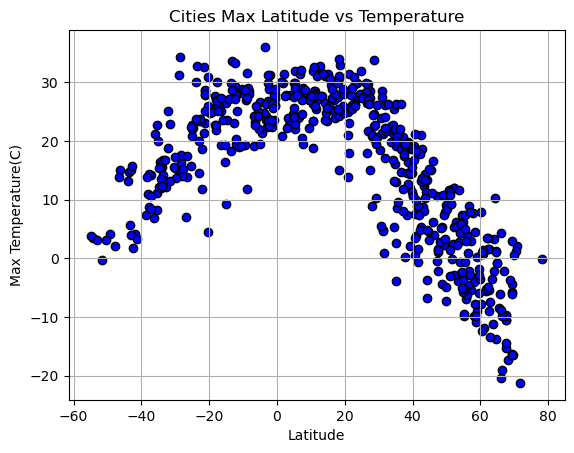

In [18]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
temp = city_data_df["Max Temp"]

plt.title("Cities Max Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")

plt.scatter(x_axis, temp, marker="o", color="blue",edgecolors="black")

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

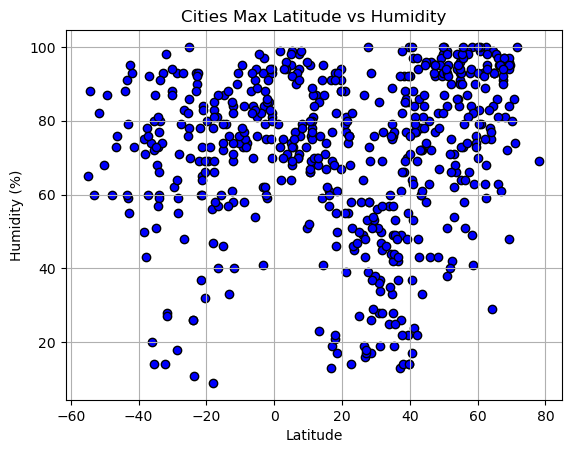

In [17]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_axis = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

plt.title("Cities Max Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.scatter(x_axis, humidity, marker="o", color="blue",edgecolors="black")

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

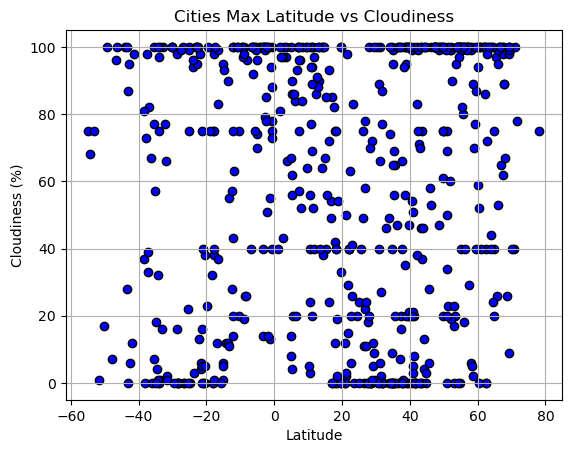

In [19]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
humidity = city_data_df["Cloudiness"]

plt.title("Cities Max Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.scatter(x_axis, humidity, marker="o", color="blue",edgecolors="black")

# Incorporate the other graph properties


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

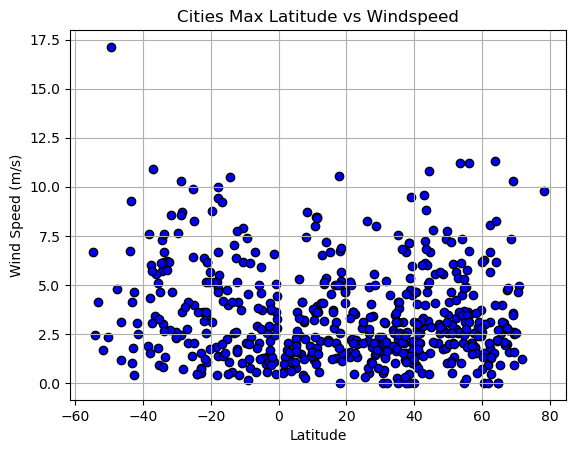

In [20]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
windspeed = city_data_df["Wind Speed"]

plt.title("Cities Max Latitude vs Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

plt.scatter(x_axis, windspeed, marker="o", color="blue",edgecolors="black")

# Incorporate the other graph properties


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df[city_data_df["Lat"]>=0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tazacorte,28.6290,-17.9293,22.54,93,0,2.06,ES,1698730636
2,bethel,41.3712,-73.4140,8.93,77,20,1.54,US,1698730637
4,turinsk,58.0458,63.6960,-4.12,84,99,1.83,RU,1698730637
5,timbuktu,16.7735,-3.0074,26.99,13,54,5.00,ML,1698730637
7,thompson,55.7435,-97.8558,-6.91,73,100,3.60,CA,1698730453


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df[city_data_df["Lat"]<0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,13.23,88,100,6.71,NZ,1698730636
3,kerikeri,-35.2268,173.9474,19.95,87,57,0.89,NZ,1698730637
6,luderitz,-26.6481,15.1594,13.91,83,0,2.02,NaN,1698730638
8,tocopilla,-22.0920,-70.1979,18.71,69,13,3.16,CL,1698730638
15,port-aux-francais,-49.3500,70.2167,4.09,87,100,17.13,TF,1698730641


###  Temperature vs. Latitude Linear Regression Plot

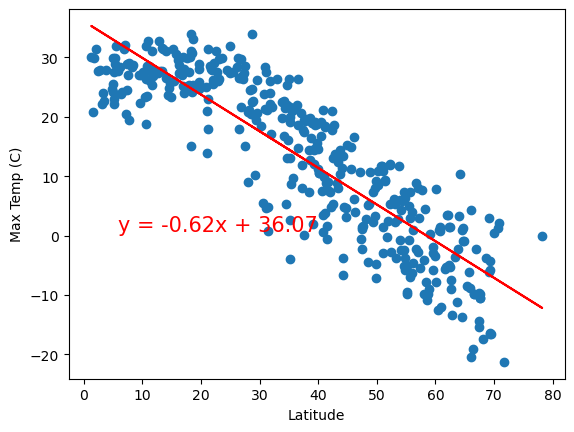

In [34]:
# Linear regression on Northern Hemisphere
north_x_values = northern_hemi_df['Lat']
north_y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x_values, north_y_values)
regress_values = north_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north_x_values,north_y_values)
plt.plot(north_x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.show()

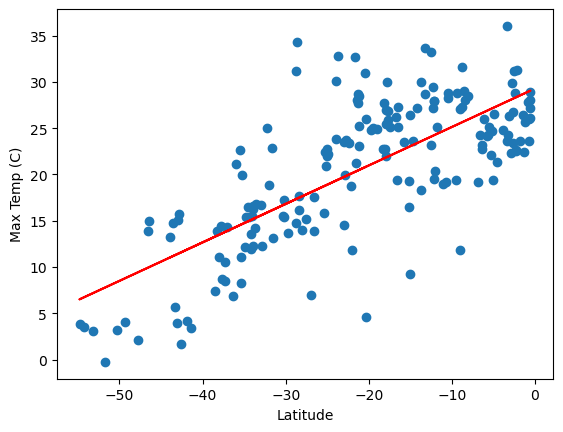

In [35]:
# Linear regression on Southern Hemisphere
south_x_values = southern_hemi_df['Lat']
south_y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x_values, south_y_values)
regress_values = south_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south_x_values,south_y_values)
plt.plot(south_x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.show()

**Discussion about the linear relationship:** In both the northern and southern hemisphere plots, the data seems to suggest that, as latitude gets closer to 0 (equator) it gets warmer. Both plots respectively show that there is a relationship between latitude and max temperatures within cities, and they both show opposing sides of the equator. 

### Humidity vs. Latitude Linear Regression Plot

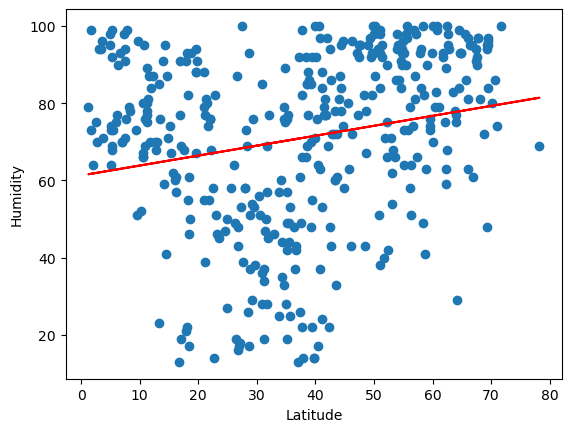

In [36]:
# Northern Hemisphere
north_x_values = northern_hemi_df['Lat']
north_y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x_values, north_y_values)
regress_values = north_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north_x_values,north_y_values)
plt.plot(north_x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

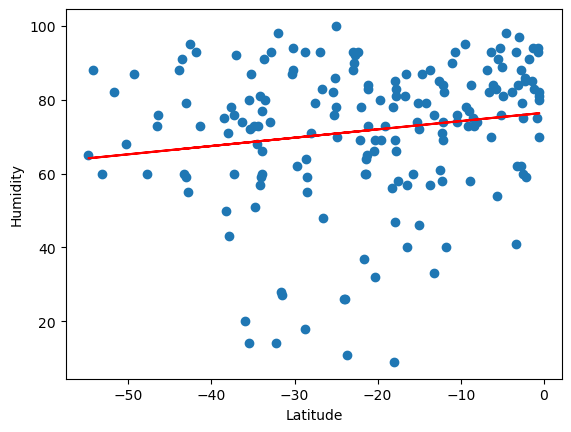

In [37]:
# Southern Hemisphere
south_x_values = southern_hemi_df['Lat']
south_y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x_values, south_y_values)
regress_values = south_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south_x_values,south_y_values)
plt.plot(south_x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** Both graphs suggested similar findings of a positive trend of increased humidity as one moved upwards through each hemispheres. 

### Cloudiness vs. Latitude Linear Regression Plot

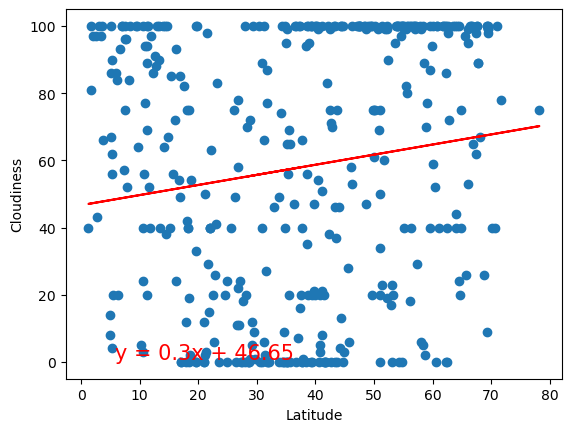

In [38]:
# Northern Hemisphere
north_x_values = northern_hemi_df['Lat']
north_y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x_values, north_y_values)
regress_values = north_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north_x_values,north_y_values)
plt.plot(north_x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

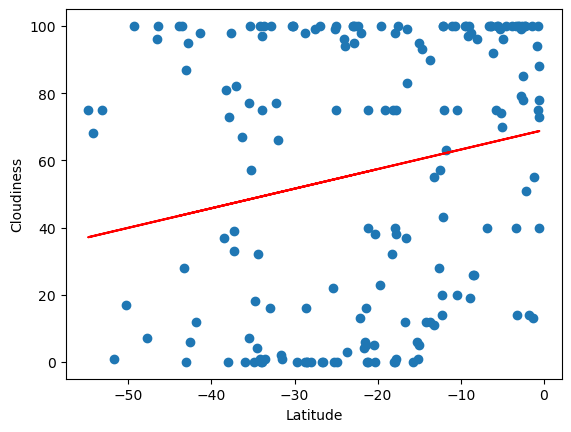

In [39]:
# Southern Hemisphere
south_x_values = southern_hemi_df['Lat']
south_y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x_values, south_y_values)
regress_values = south_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south_x_values,south_y_values)
plt.plot(south_x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** In both hemisphere graphs, there seems to be a positive trend of increasing cloudiness as one moves up in each hemisphere. Regardless of relationship to the equator, there seems to be the most clouds at the center of the Northern Hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

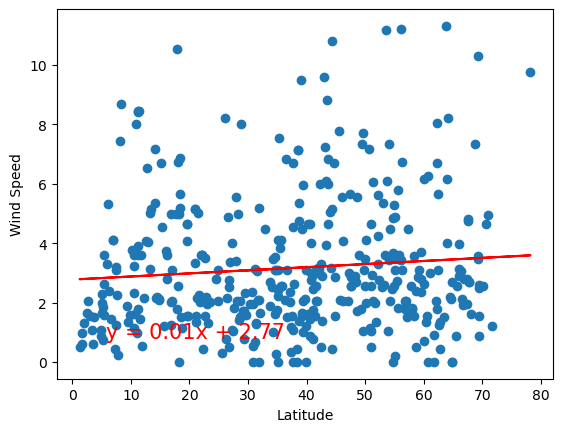

In [40]:
# Northern Hemisphere
north_x_values = northern_hemi_df['Lat']
north_y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x_values, north_y_values)
regress_values = north_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north_x_values,north_y_values)
plt.plot(north_x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

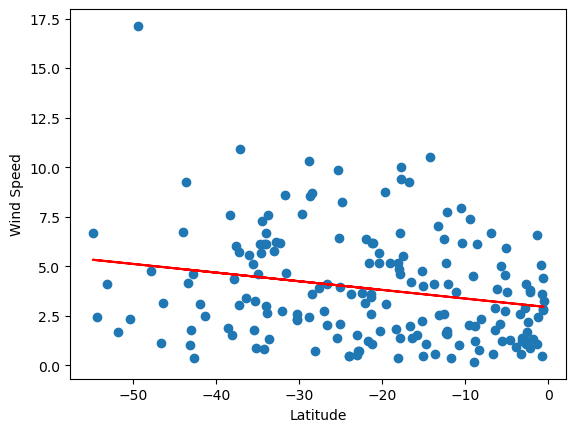

In [41]:
# Southern Hemisphere
south_x_values = southern_hemi_df['Lat']
south_y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x_values, south_y_values)
regress_values = south_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south_x_values,south_y_values)
plt.plot(south_x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** Both graphs show that wind speed seems to increase the further you are from the equator. 